# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in data

In [2]:
resale_data = pd.read_csv('./raw_data/jan_1990_to_feb_2018.csv')

# Cleaning the data

## Splitting the date into 'year' and 'month'

In [3]:
resale_data['year'] = resale_data['month'].apply(lambda x: int(x.split('-')[0]))

In [4]:
resale_data['month'] = resale_data['month'].apply(lambda x: int(x.split('-')[1]))

## Converting the relevant columns to integers

In [5]:
resale_data['floor_area_sqm'] = resale_data['floor_area_sqm'].apply(lambda x: int(x))
resale_data['lease_commence_date'] = resale_data['lease_commence_date'].apply(lambda x: int(x))
resale_data['resale_price'] = resale_data['resale_price'].apply(lambda x: int(x))

## Converting all entries in 'flat_model' column to uppercase

In [6]:
resale_data['flat_model'] = resale_data['flat_model'].apply(lambda x: x.upper())

## Remove the '-' in 'Multi-Generation' for 'flat_type'

In [7]:
resale_data['flat_type'] = resale_data['flat_type'].apply(lambda x: x.replace('-', ' '))

## Creating dummy variables

In [53]:
cleaned_resale_data = pd.get_dummies(resale_data)

In [56]:
cleaned_resale_data.head()

,month,floor_area_sqm,lease_commence_date,resale_price,year,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,flat_model_MULTI GENERATION,flat_model_NEW GENERATION,flat_model_PREMIUM APARTMENT,flat_model_PREMIUM APARTMENT LOFT,flat_model_PREMIUM MAISONETTE,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_TERRACE,flat_model_TYPE S1,flat_model_TYPE S2
0,1,117,1978,118000,1990,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,90,1978,64500,1990,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,92,1978,72500,1990,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,67,1978,34000,1990,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,74,1978,37000,1990,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Get a set of all towns that are available in the dataset

In [8]:
towns = set(resale_data['town'].values)

## Get a graphical representation of resale prices across the years for each room type for each town

c:\users\nelgoh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


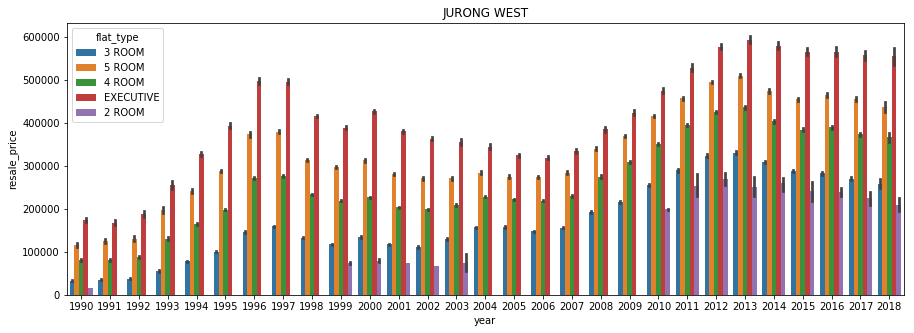

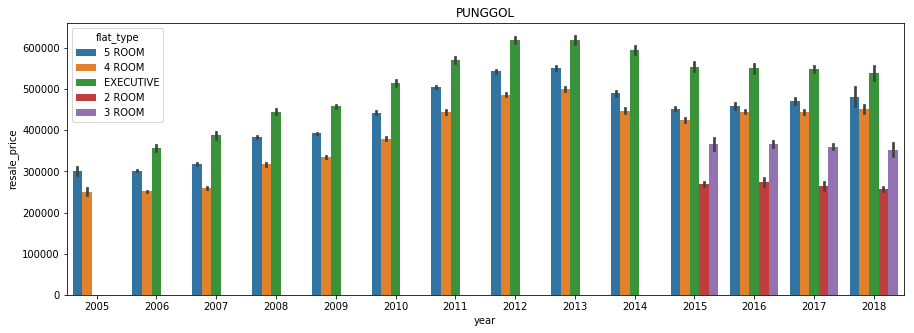

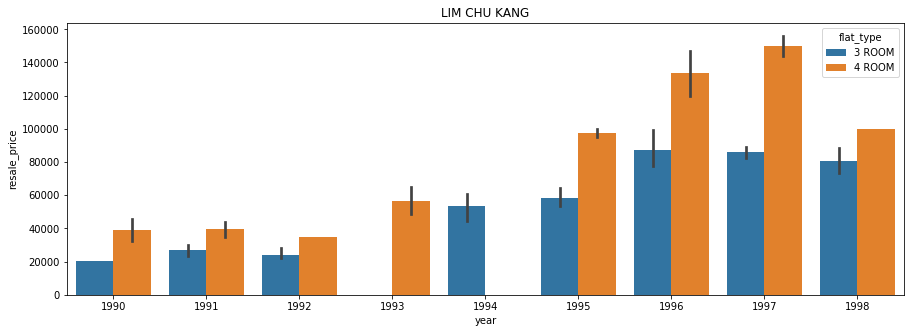

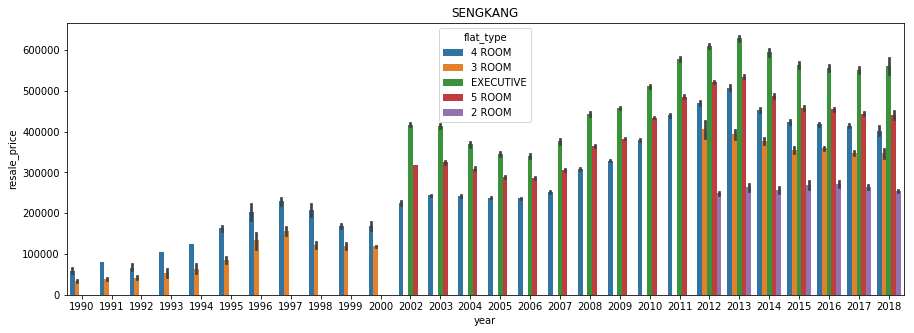

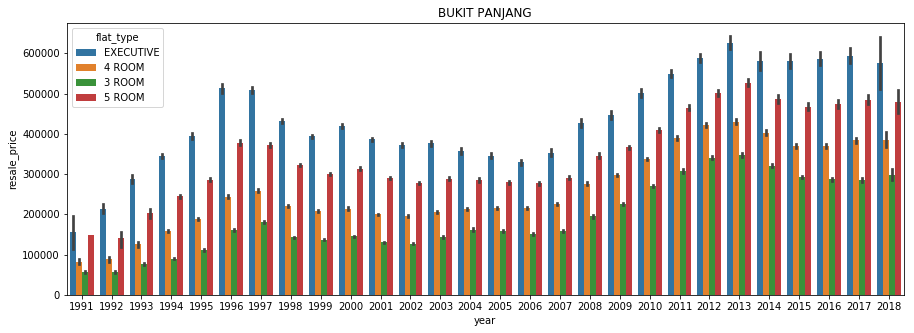

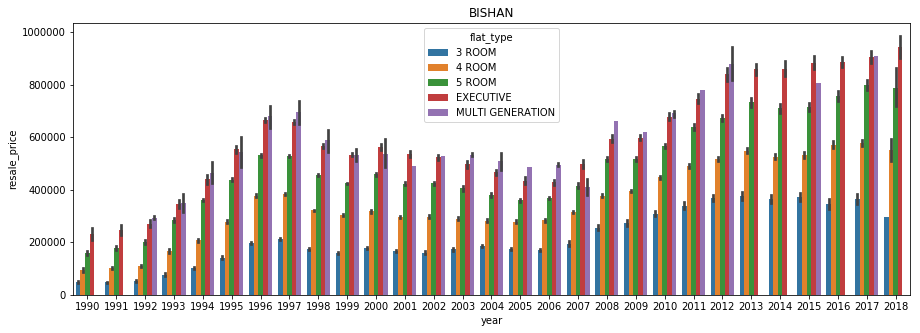

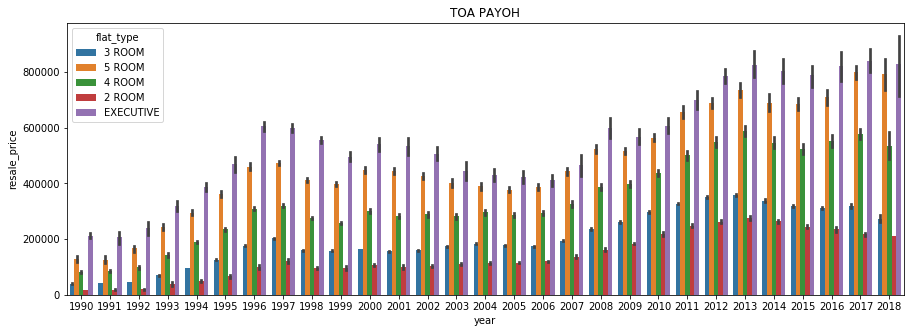

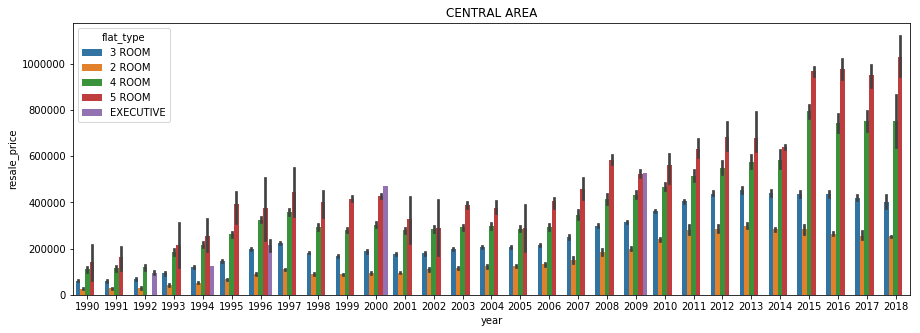

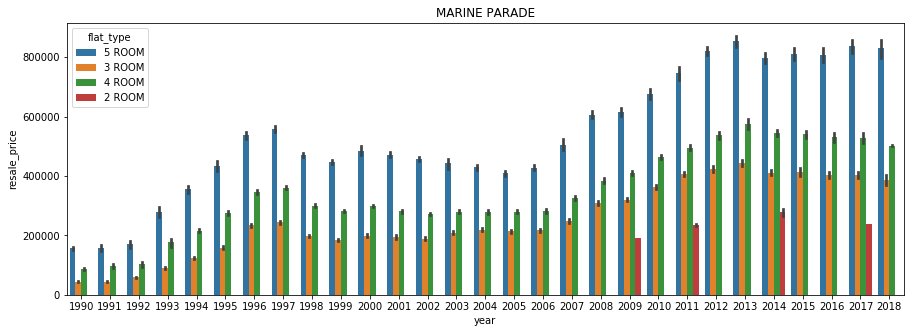

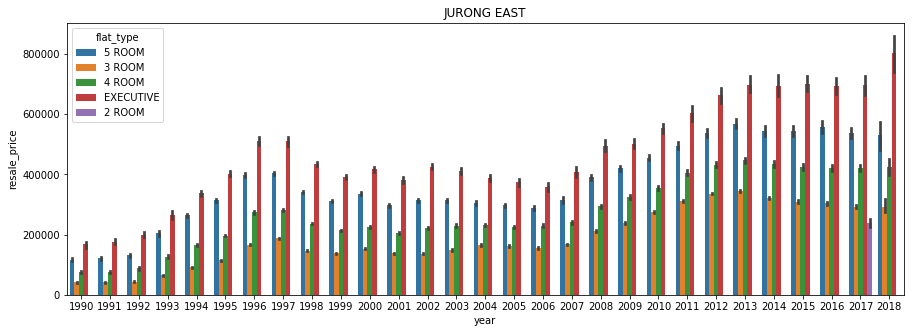

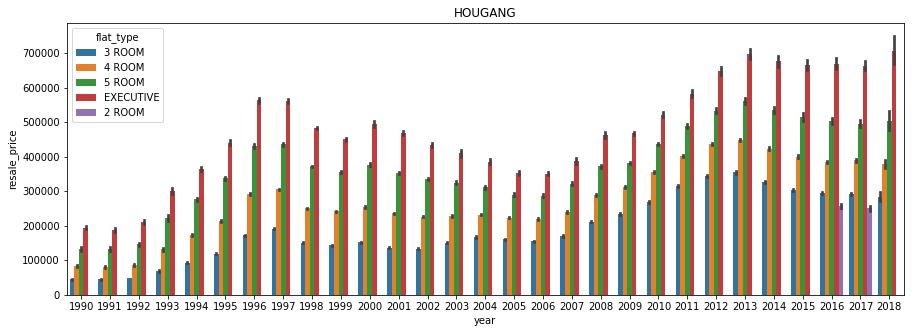

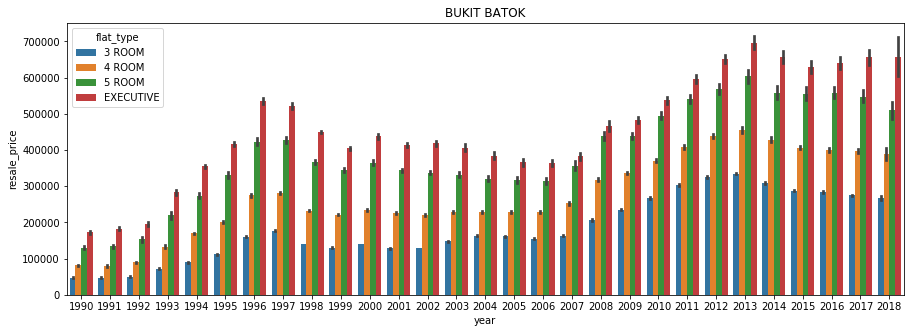

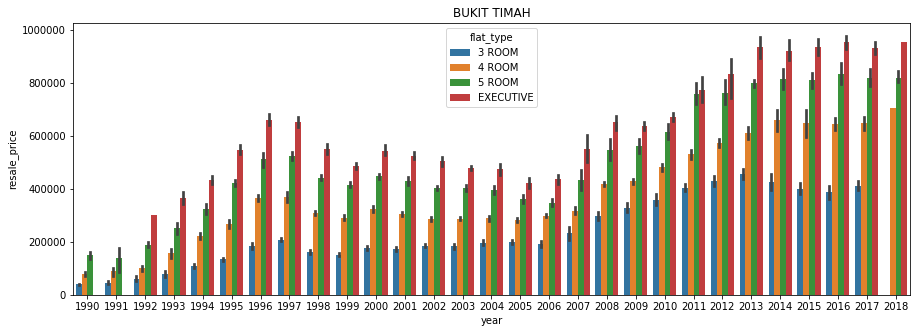

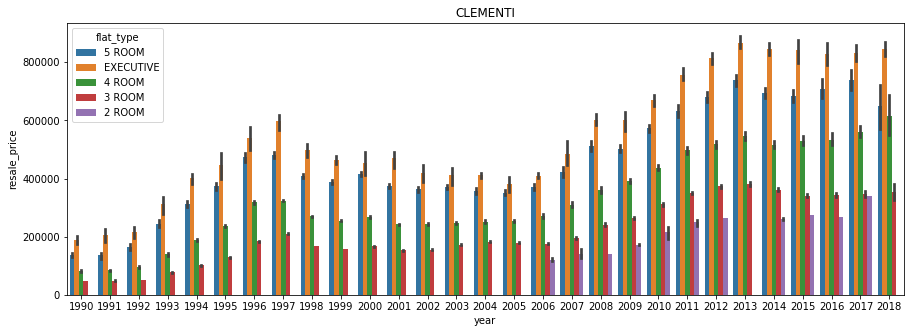

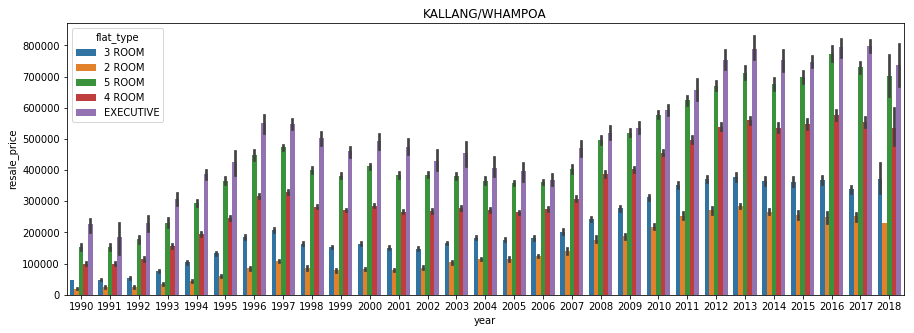

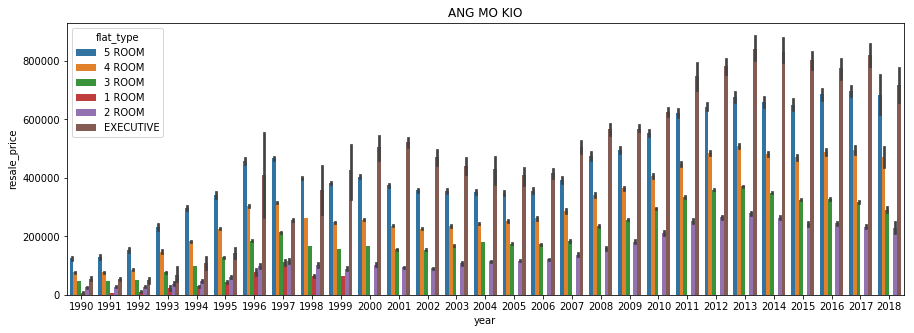

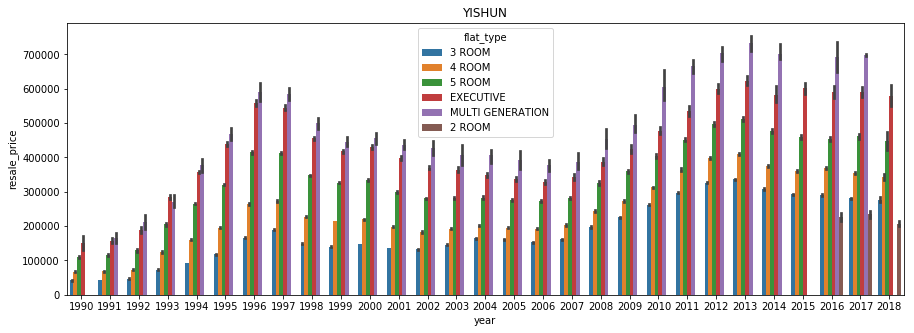

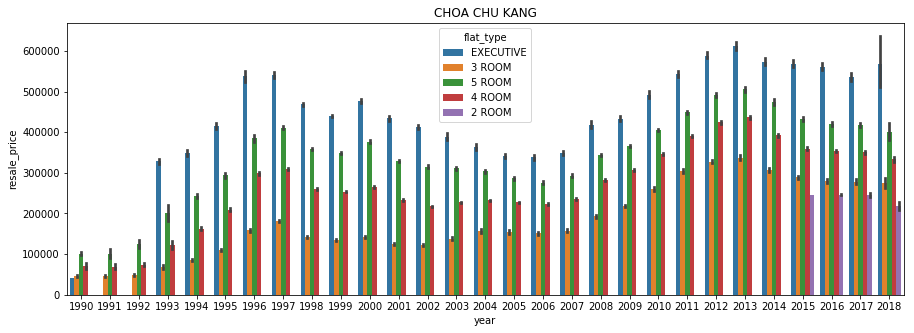

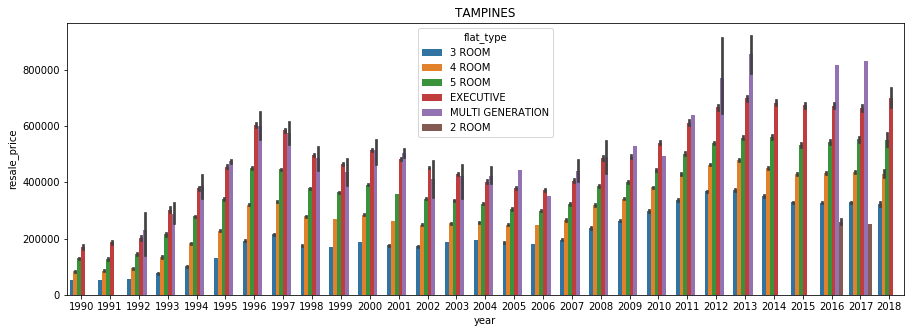

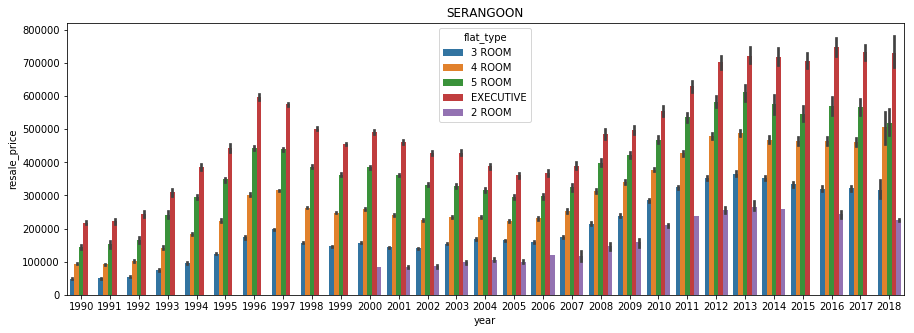

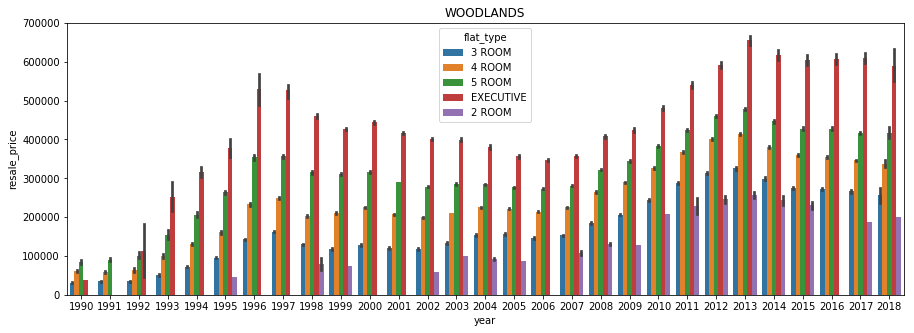

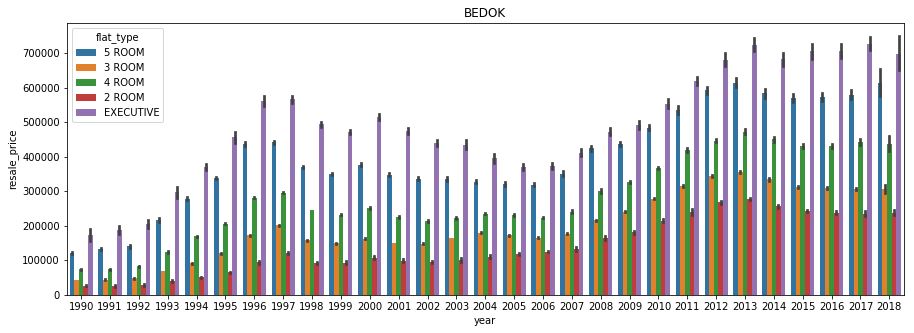

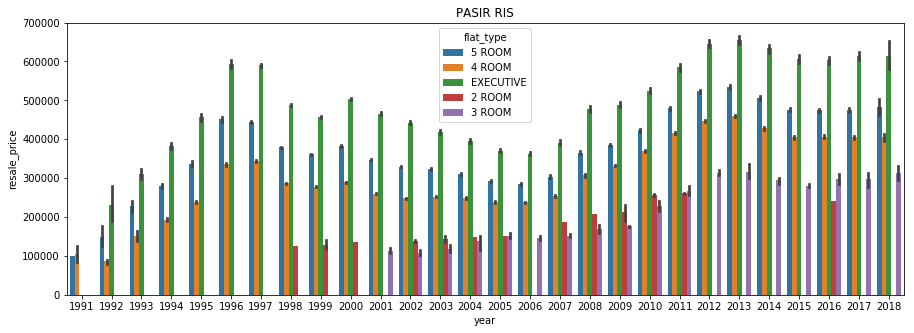

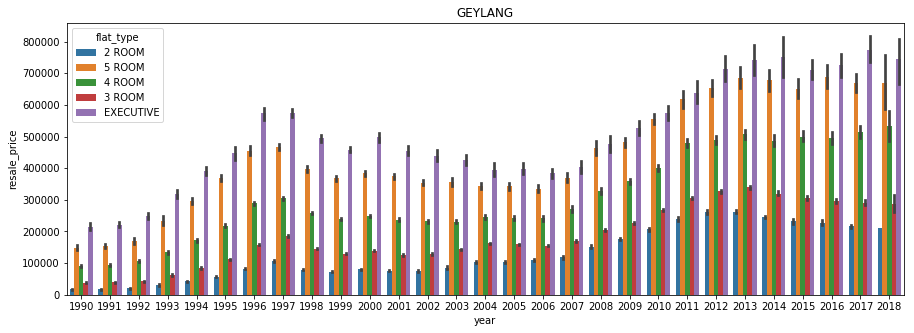

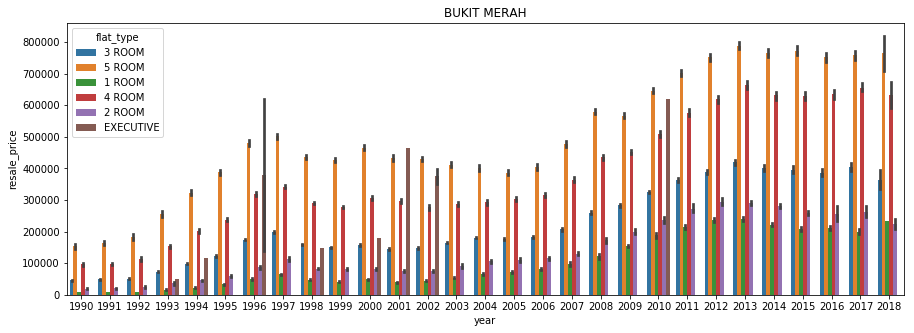

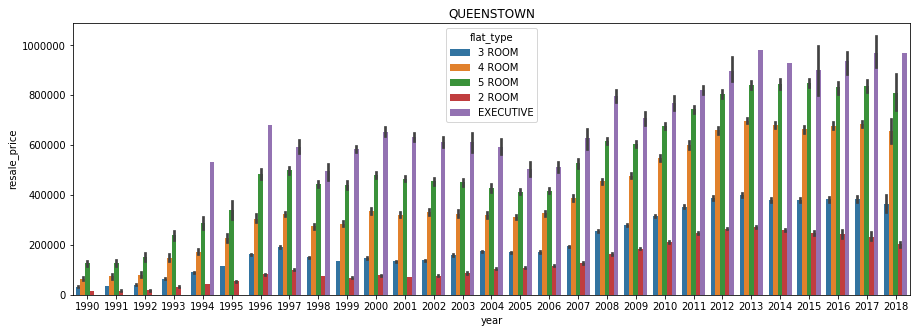

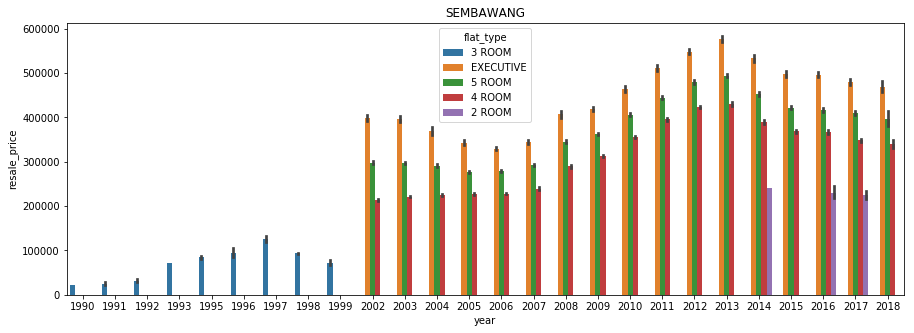

In [33]:
for each_town in towns:
    fig, axs = plt.subplots(figsize=(15,5))
    x = sns.barplot(x='year', y='resale_price', data=resale_data.loc[resale_data['town'] == each_town], hue='flat_type').set_title(each_town)

## Split the dataframe into smaller subsets, by town

In [9]:
dfs_by_town = {}

for each_town in towns:
    dfs_by_town[each_town] = resale_data.loc[resale_data['town'] == each_town]

In [10]:
dfs_by_town['JURONG WEST']

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
841,1,JURONG WEST,3 ROOM,8,YUNG KUANG RD,01 TO 03,70,IMPROVED,1973,22500,1990
842,1,JURONG WEST,3 ROOM,10,YUNG KUANG RD,07 TO 09,64,IMPROVED,1973,27000,1990
843,1,JURONG WEST,3 ROOM,111,HO CHING RD,04 TO 06,68,IMPROVED,1970,25000,1990
844,1,JURONG WEST,3 ROOM,114,HO CHING RD,10 TO 12,67,IMPROVED,1971,28000,1990
845,1,JURONG WEST,3 ROOM,119,HO CHING RD,01 TO 03,67,IMPROVED,1972,22500,1990
846,1,JURONG WEST,3 ROOM,119,HO CHING RD,10 TO 12,67,IMPROVED,1972,22500,1990
847,1,JURONG WEST,3 ROOM,120,HO CHING RD,01 TO 03,67,IMPROVED,1972,28500,1990
848,1,JURONG WEST,3 ROOM,120,HO CHING RD,07 TO 09,67,IMPROVED,1972,26500,1990
849,1,JURONG WEST,3 ROOM,120,HO CHING RD,10 TO 12,67,IMPROVED,1972,31500,1990
850,1,JURONG WEST,3 ROOM,145,HU CHING RD,04 TO 06,64,IMPROVED,1976,23400,1990


## Get a set of all streets for each town that are available in the dataset

In [11]:
town_to_streets = {}

for each_town in towns:
    town_to_streets[each_town] = set(resale_data.loc[resale_data['town'] == each_town]['street_name'])

In [13]:
dfs_by_town_street = {}

for each_town in town_to_streets:
    dfs_by_town_street[each_town] = {}
    for each_street in town_to_streets[each_town]:
        dfs_by_town_street[each_town][each_street] = resale_data.loc[(resale_data['town'] == each_town) & (resale_data['street_name'] == each_street)]